<h1 align='center' style='color:purple'>Clustering With K Means - Python Tutorial</h1>

In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("/content/drive/MyDrive/income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

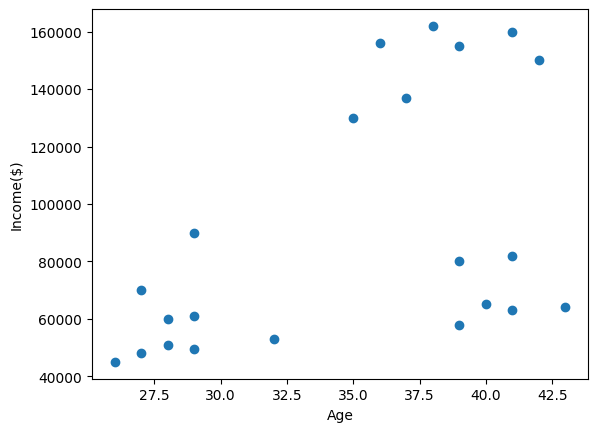

In [4]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [5]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [6]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [7]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

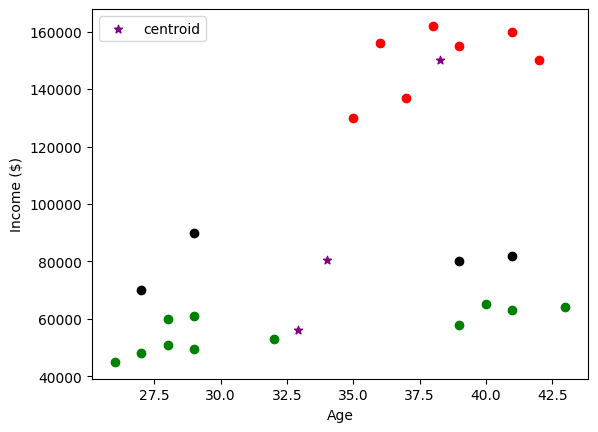

In [8]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

<h4 style='color:purple'>Preprocessing using min max scaler</h4>

In [9]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [10]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


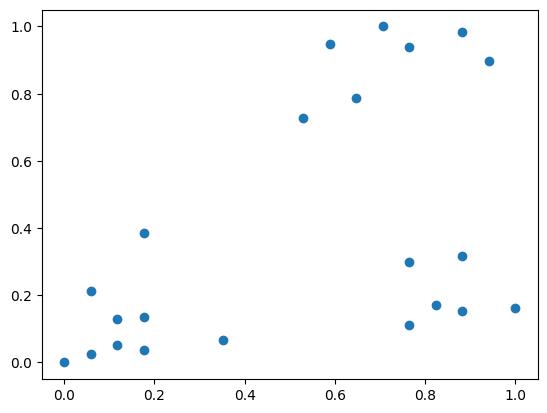

In [11]:
plt.scatter(df.Age,df['Income($)'])

In [12]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [13]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,2


In [14]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ]])

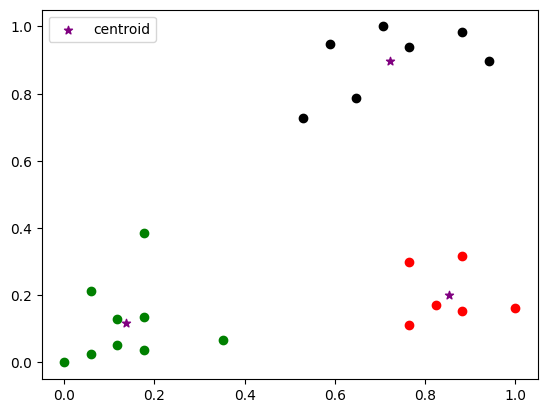

In [15]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

<h4 style='color:purple'>Elbow Plot</h4>

In [16]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

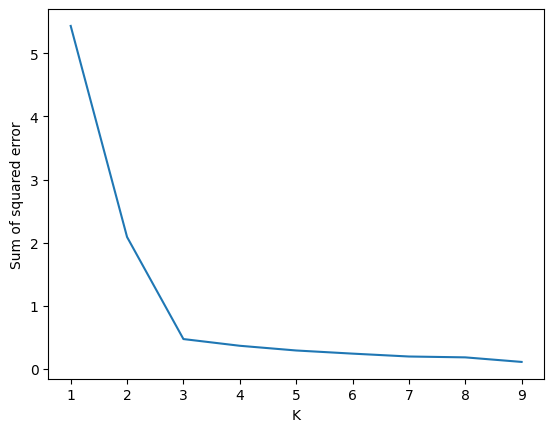

In [17]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

<h4 style='color:purple'>Exercise</h4>

In [18]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Hierarchical and db scan

In [20]:
from sklearn.preprocessing import StandardScaler

# Select numerical features
X = df[['Age', 'Income($)']]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


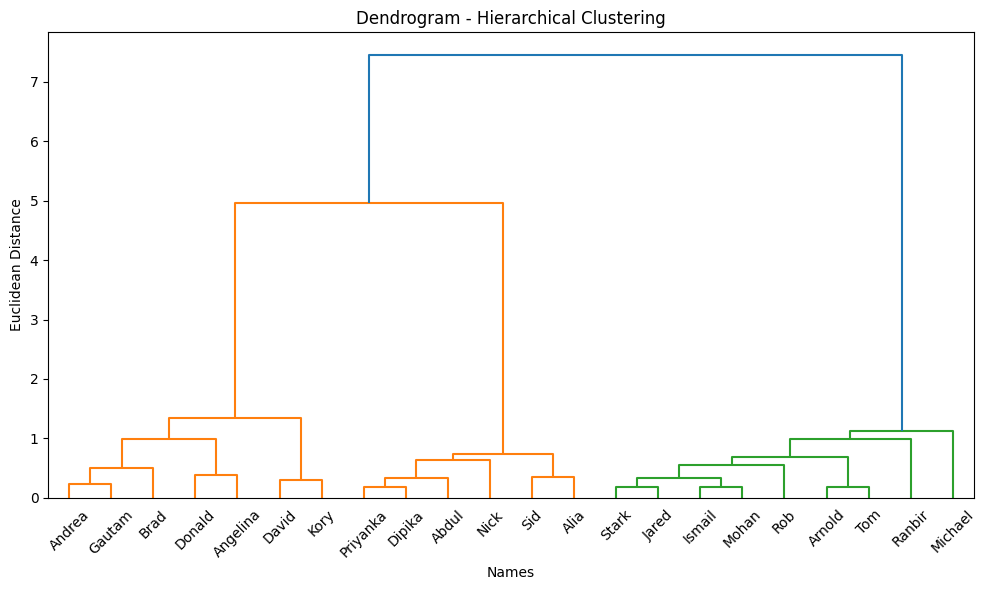

In [21]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate linkage matrix
linked = linkage(X_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked, labels=df['Name'].values, orientation='top', distance_sort='descending')
plt.title("Dendrogram - Hierarchical Clustering")
plt.xlabel("Names")
plt.ylabel("Euclidean Distance")
plt.tight_layout()
plt.show()


In [22]:
from sklearn.cluster import AgglomerativeClustering

# Fit model
hc = AgglomerativeClustering(n_clusters=3)
hc_labels = hc.fit_predict(X_scaled)

# Add results to DataFrame
df['HC_Cluster'] = hc_labels


In [23]:
from sklearn.cluster import DBSCAN

# Fit DBSCAN
db = DBSCAN(eps=0.8, min_samples=2)
db_labels = db.fit_predict(X_scaled)

# Add DBSCAN results
df['DBSCAN_Cluster'] = db_labels


In [24]:
df


,Name,Age,Income($),cluster,HC_Cluster,DBSCAN_Cluster
0,Rob,0.058824,0.213675,0,1,0
1,Michael,0.176471,0.384615,0,1,0
2,Mohan,0.176471,0.136752,0,1,0
3,Ismail,0.117647,0.128205,0,1,0
4,Kory,0.941176,0.897436,2,0,1
5,Gautam,0.764706,0.940171,2,0,1
6,David,0.882353,0.982906,2,0,1
7,Andrea,0.705882,1.000000,2,0,1
8,Brad,0.588235,0.948718,2,0,1
9,Angelina,0.529412,0.726496,2,0,1


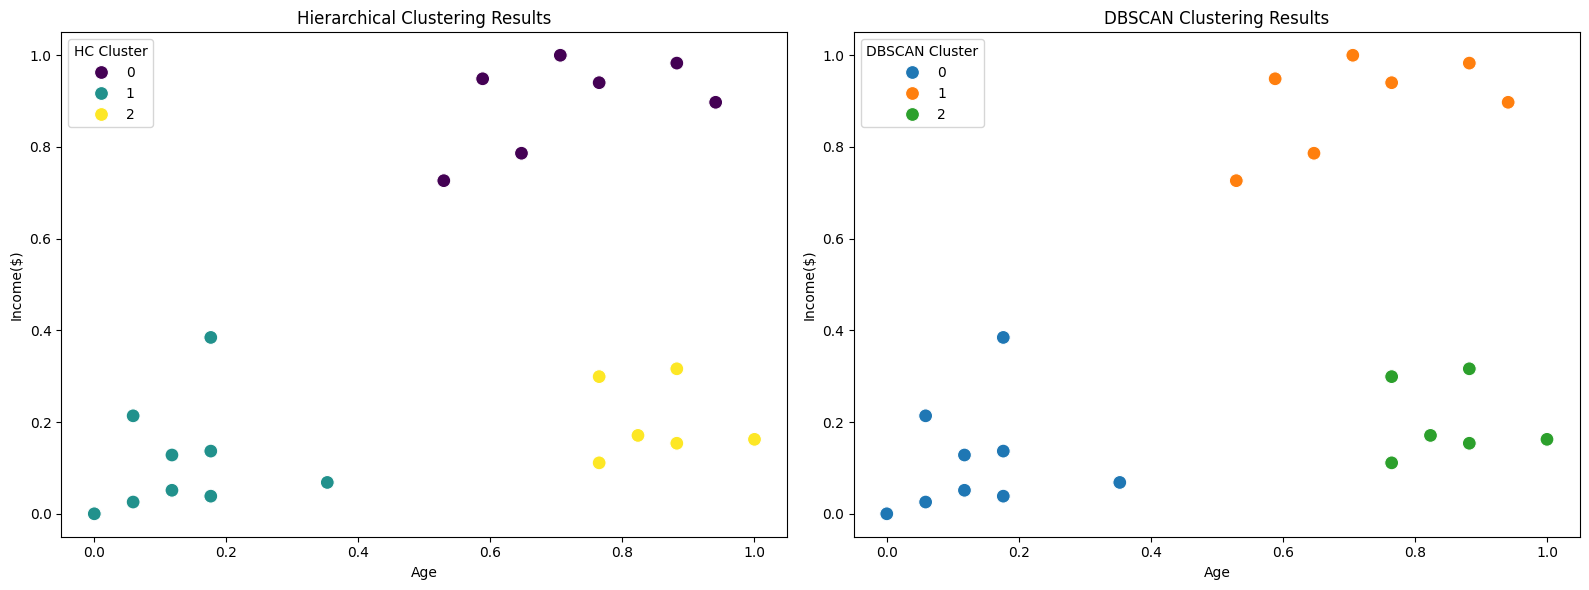

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Hierarchical Clustering Plot
sns.scatterplot(ax=axes[0], data=df, x='Age', y='Income($)', hue='HC_Cluster', palette='viridis', s=100)
axes[0].set_title("Hierarchical Clustering Results")
axes[0].legend(title='HC Cluster')

# DBSCAN Plot
sns.scatterplot(ax=axes[1], data=df, x='Age', y='Income($)', hue='DBSCAN_Cluster', palette='tab10', s=100)
axes[1].set_title("DBSCAN Clustering Results")
axes[1].legend(title='DBSCAN Cluster')

plt.tight_layout()
plt.show()
